# Importando bibliotecas importantes

In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

import keras
import numpy as np

In [2]:
%matplotlib notebook 
import matplotlib.pyplot as plt

In [3]:
from PIL import Image

### Bibliotecas pessoais

In [4]:
from dataHandler import dataHandler

# Carregando dados

In [5]:
data = dataHandler()
data.loadData("data/")

### Codificando labels via One Hot Encoding

In [6]:
data.oneHotEncode()

In [7]:
print("- Foram detectadas %d classes diferentes" % data.getClassCount())
print(data.classes)

- Foram detectadas 52 classes diferentes
['(' '0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G'
 'H' 'I' 'J' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'T' 'Y' '_' 'a' 'b' 'd' 'e' 'g'
 'h' 'i' 'j' 'k' 'm' 'n' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'z' 'Ç']


### Reformatação das features em caso de usar CNN

In [8]:
data.reshapeInputs()

### Obtendo dados
Os dados de treino e teste são divididos durante o carregamento

In [9]:
train_features, test_features = data.getFeatures()
train_labels, test_labels = data.getLabels()

### Visualizando dados

<IPython.core.display.Javascript object>


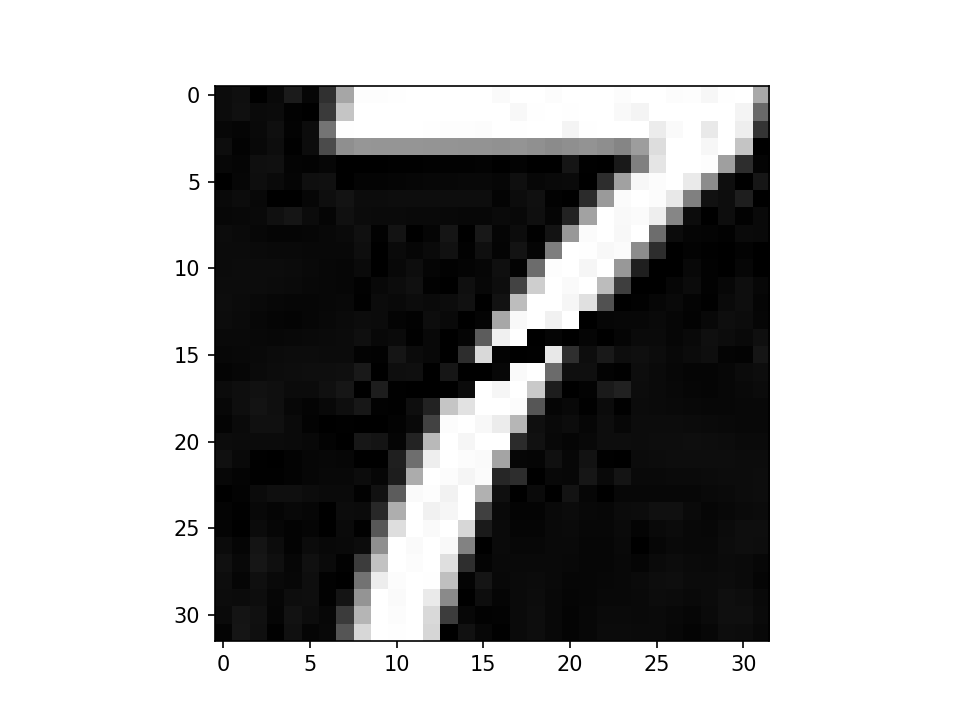

<IPython.core.display.Javascript object>


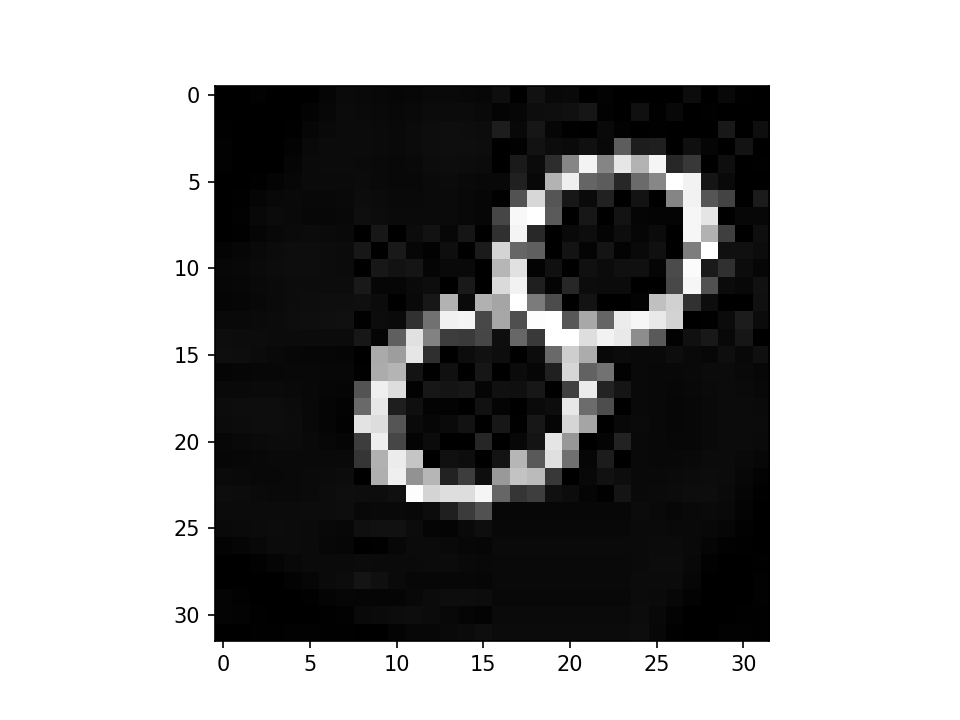

In [10]:
img1 = Image.fromarray(train_features[4].reshape(32,32))
img2 = Image.fromarray(train_features[5].reshape(32,32))

plt.figure()
plt.imshow(img1, cmap='gray')
plt.figure()
plt.imshow(img2, cmap='gray')

In [11]:
print(data.oneHotDecode(train_labels[4]))
print(data.oneHotDecode(train_labels[5]))

7
8


In [12]:
print("- Tamanho do conjunto de treino: %d" % len(train_features))
print("- Tamanho do conjunto de teste: %d" % len(test_features))

- Tamanho do conjunto de treino: 166400
- Tamanho do conjunto de teste: 41600


# Criando rede neural

In [13]:
inputShape = train_features[0].shape[0]
numClasses = data.getClassCount()

print("- Tamanho linear dos dados de entrada: %d" % inputShape)

- Tamanho linear dos dados de entrada: 32


### MLP

In [137]:
model = keras.Sequential()
model.add(keras.layers.Dense(512, input_dim=inputShape, activation='selu'))
model.add(keras.layers.Dropout(0.8))

model.add(keras.layers.Dense(256, input_dim=inputShape, activation='selu'))
model.add(keras.layers.normalization.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(256, input_dim=inputShape, activation='selu'))
model.add(keras.layers.normalization.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(256, input_dim=inputShape, activation='selu'))
model.add(keras.layers.normalization.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(numClasses, activation="softmax"))

### CNN

In [32]:
model = keras.Sequential()

model.add(keras.layers.Lambda(lambda image: image * (1/255.0), input_shape = (inputShape,inputShape,1)))

model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,1)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(numClasses, activation='softmax'))

In [ ]:
# Rede 3
'''model = keras.Sequential()

model.add(keras.layers.Lambda(lambda image: image * (1/255.0), input_shape = (inputShape,inputShape,1)))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,1)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(numClasses, activation='softmax'))'''
# Rede inicial
'''model = keras.Sequential()

model.add(keras.layers.Lambda(lambda image: image * (1/255.0), input_shape = (inputShape,inputShape,1)))

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='selu'))
#model.add(keras.layers.Dense(512, activation='selu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(numClasses, activation='softmax'))'''

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 128)       1280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 29, 128)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 29, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 27, 64)        73792     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 13, 64)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 6, 13, 64)        

## Compilando modelo

In [34]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Checkpoint

In [35]:
checkDir = "checkpoint/"

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkDir,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# Treinando modelo

In [36]:
history = model.fit(train_features, train_labels, epochs=30, batch_size=128,
                    validation_data=(test_features, test_labels), callbacks=[model_checkpoint_callback])

Epoch 1/30
1300/1300 [==============================] - 52s 39ms/step - loss: 1.7441 - accuracy: 0.5359 - val_loss: 0.3149 - val_accuracy: 0.9064
Epoch 2/30
1300/1300 [==============================] - 50s 39ms/step - loss: 0.4977 - accuracy: 0.8447 - val_loss: 0.2210 - val_accuracy: 0.9316
Epoch 3/30
1300/1300 [==============================] - 50s 39ms/step - loss: 0.3720 - accuracy: 0.8805 - val_loss: 0.1964 - val_accuracy: 0.9422
Epoch 4/30
1300/1300 [==============================] - 50s 39ms/step - loss: 0.3035 - accuracy: 0.9021 - val_loss: 0.1639 - val_accuracy: 0.9517
Epoch 5/30
1300/1300 [==============================] - 50s 39ms/step - loss: 0.2741 - accuracy: 0.9096 - val_loss: 0.1677 - val_accuracy: 0.9472
Epoch 6/30
1300/1300 [==============================] - 50s 39ms/step - loss: 0.2498 - accuracy: 0.9181 - val_loss: 0.1612 - val_accuracy: 0.9494
Epoch 7/30
1300/1300 [==============================] - 51s 39ms/step - loss: 0.2290 - accuracy: 0.9233 - val_loss: 0.1571 -

<IPython.core.display.Javascript object>


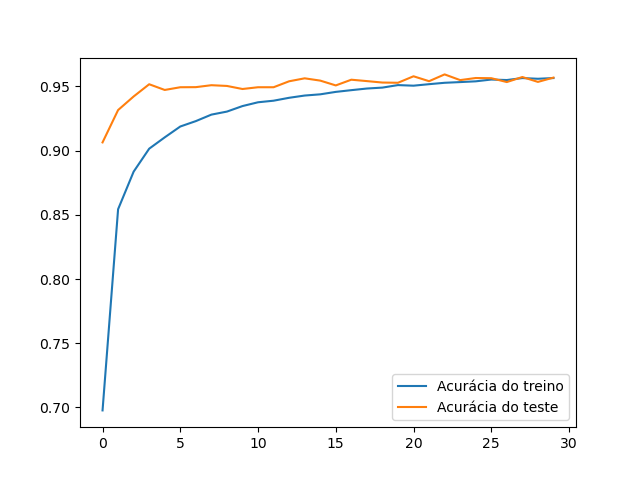

In [37]:
plt.figure()
plt.plot(history.history['accuracy'], label="Acurácia do treino")
plt.plot(history.history['val_accuracy'], label = "Acurácia do teste")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


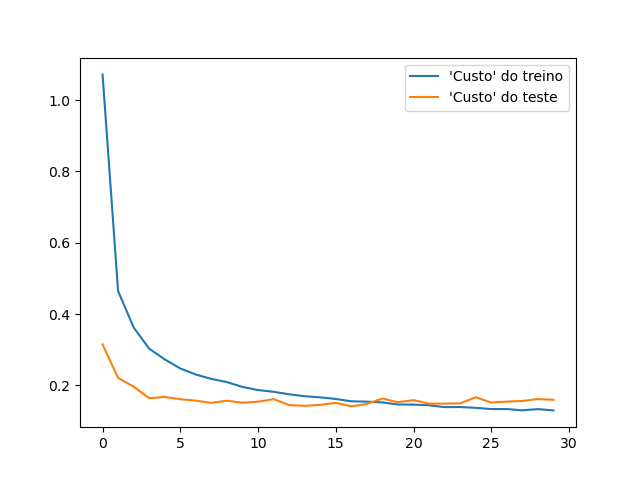

In [38]:
plt.figure()
plt.plot(history.history['loss'], label = "'Custo' do treino")
plt.plot(history.history['val_loss'], label= "'Custo' do teste")
plt.legend()
plt.show()

# Visualizando filtros da rede CNN

<IPython.core.display.Javascript object>


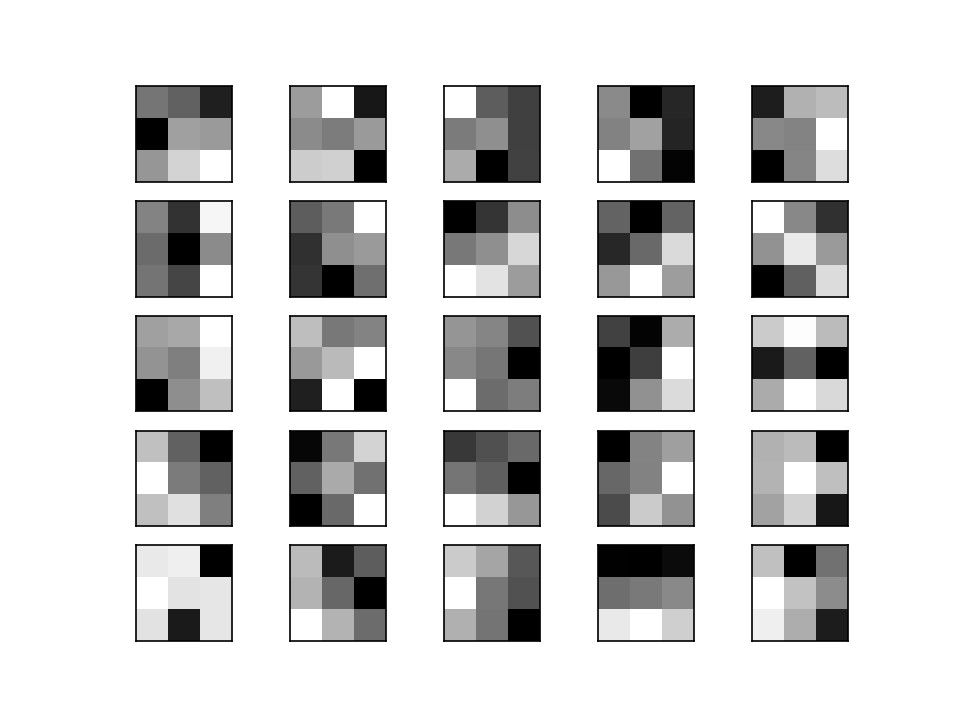

In [22]:
# Obtem pesos da segunda camada
filters, biases = model.layers[1].get_weights()
# Normaliza valores entre 0 e 1
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

n_filters = 25

size = (5,5)

fig, ax = plt.subplots(size[0], size[1])

for i in range(n_filters):
    f = filters[:, :, :, i]
    row = i % size[0]
    col = i//size[1]
    ax[row][col].set_xticks([])
    ax[row][col].set_yticks([])

    ax[row][col].imshow(f.reshape((3,3)), cmap='gray')


plt.show()

# Avaliando modelo

__Carrega o melhor peso__

In [39]:
model.load_weights(checkDir)

__Acurácia média__

In [40]:
_, accuracy = model.evaluate(test_features, test_labels)
print("Acurácia do modelo nos dados de teste: %.2f%%" % (accuracy*100.0))

1300/1300 [==============================] - 6s 5ms/step - loss: 0.1489 - accuracy: 0.9594
Acurácia do modelo nos dados de teste: 95.94%


__Acurácia individual__

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(test_features, batch_size=256, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
y = np.argmax(test_labels, axis=1)

163/163 [==============================] - 4s 19ms/step


In [42]:
cm = confusion_matrix(y, y_pred_bool)

<IPython.core.display.Javascript object>


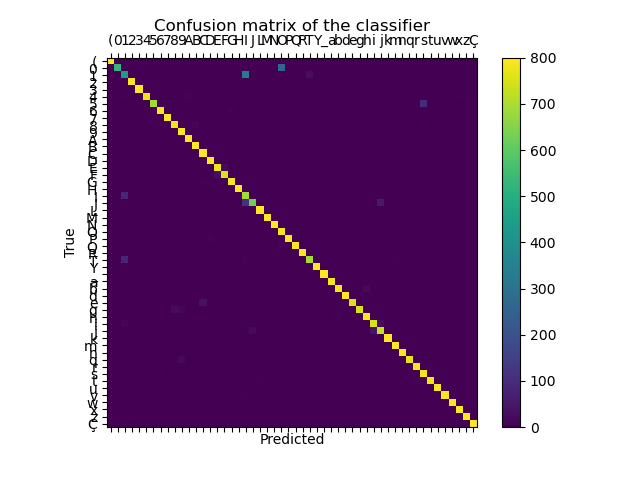

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticks(range(cm.shape[0]))
ax.set_yticks(range(cm.shape[1]))
ax.set_xticklabels(list(data.classes))
ax.set_yticklabels(list(data.classes))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [110]:
print(classification_report(y, y_pred_bool, target_names=data.classes))
# Precision = (previsão c correta)/(previsão c correta + previsão c em rótulo diferente)
# Recall = (previsão c correto)/(quantidade total de f's)

              precision    recall  f1-score   support

           (       1.00      1.00      1.00       800
           0       0.97      0.84      0.90       800
           1       0.81      0.48      0.61       800
           2       0.99      0.98      0.99       800
           3       1.00      1.00      1.00       800
           4       0.99      0.98      0.98       800
           5       0.98      0.96      0.97       800
           6       0.99      0.96      0.97       800
           7       0.99      0.99      0.99       800
           8       0.99      0.97      0.98       800
           9       0.97      0.99      0.98       800
           A       0.99      0.98      0.98       800
           B       0.98      1.00      0.99       800
           C       0.91      0.99      0.95       800
           D       1.00      1.00      1.00       800
           E       0.95      0.99      0.97       800
           F       0.98      0.94      0.96       800
           G       0.96    

# Salvando modelo

In [145]:
modelDir = "model/"
model.save(modelDir)

with open(modelDir + "classes.txt",'w') as f:
    for c in data.classes:
        f.write(str(c) + " ")

INFO:tensorflow:Assets written to: model/assets


# Testando modelo

__MLP__

In [26]:
import cv2

# Função para carregar imagem
def loadImage(fileName, printImg = False):
    # Carrega a imagem e aplica um threshold para ficar igual
    # as imagens do treino
    img = cv2.imread(fileName, cv2.IMREAD_GRAYSCALE)
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU) 

    # Ajusta o tamanho da imagem
    img = cv2.resize(img, (32,32))
    
    if printImg:
        plt.figure()
        plt.imshow(img, cmap='gray')
    
    return list(img.flatten().tolist())


def getChar(x):
    label = model.predict([x], batch_size=1)
    
    char = data.oneHotDecode(label)
    
    return char

__CNN__

In [28]:
import cv2

# Função para carregar imagem
def loadImage(fileName, printImg = False, invert = True):
    # Carrega a imagem e aplica um threshold para ficar igual
    # as imagens do treino
    img = cv2.imread(fileName, cv2.IMREAD_GRAYSCALE)
    
    if invert:
        _, img = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
    else:
        _, img = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)

    # Ajusta o tamanho da imagem
    img = cv2.resize(img, (32,32))
    
    if printImg:
        plt.figure()
        plt.imshow(img, cmap='gray')
        
    img = img.reshape((1,32,32,1))
    
    return img


def getChar(x, verbose = 0):
    label = model.predict(x, batch_size=1)
    
    if verbose == 1:
        print(label)
    elif verbose == 2:
        print(label[0][np.argmax(label)])
        
    char = data.oneHotDecode(label)
    
    return char

In [111]:
x = loadImage("testes/letraa.png")
c = getChar(x)
print("O caractere reconhecido foi %s" % c)

O caractere reconhecido foi a


In [112]:
x = loadImage("testes/letraa3.png")
c = getChar(x)
print("O caractere reconhecido foi %s" % c)

O caractere reconhecido foi a


In [113]:
x = loadImage("testes/letra.png")
c = getChar(x)
print("O caractere reconhecido foi %s" % c)

O caractere reconhecido foi 9


In [114]:
x = loadImage("testes/letraAu.png")
c = getChar(x)
print("O caractere reconhecido foi %s" % c)

O caractere reconhecido foi A


In [115]:
x = loadImage("testes/cidilha.png")
c = getChar(x)
print("O caractere reconhecido foi %s" % c)

O caractere reconhecido foi e


In [116]:
x = loadImage("testes/cidilhau.png")
c = getChar(x,2)
print("O caractere reconhecido foi %s" % c)

0.9977664
O caractere reconhecido foi Ç


<IPython.core.display.Javascript object>


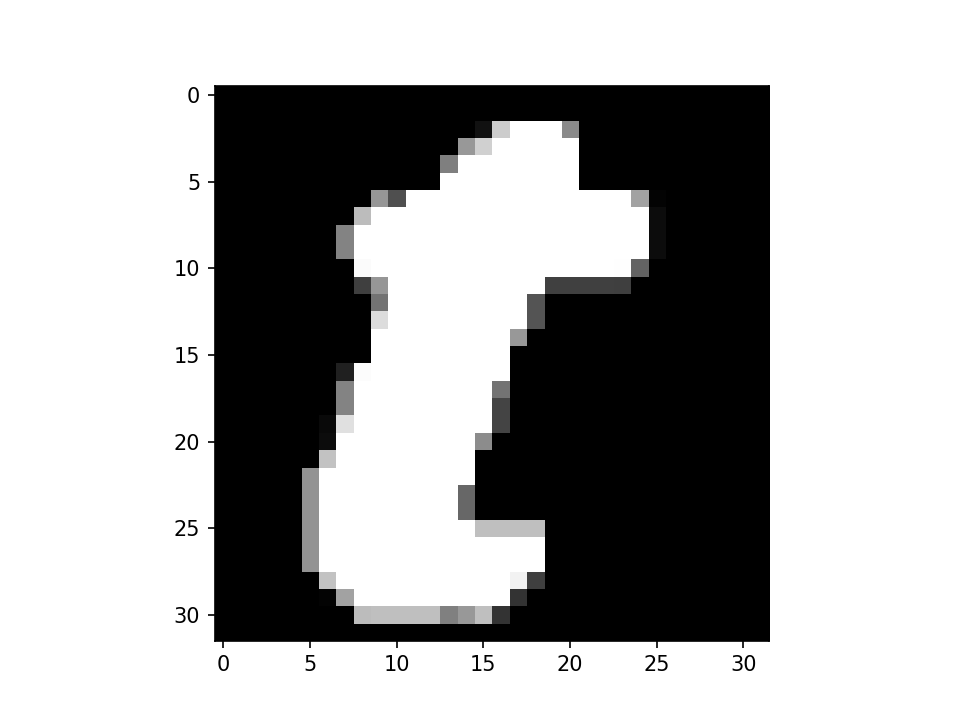

O caractere reconhecido foi t


In [118]:
x = loadImage("testes/real12.png", True, invert = False)
c = getChar(x)
print("O caractere reconhecido foi %s" % c)

<IPython.core.display.Javascript object>


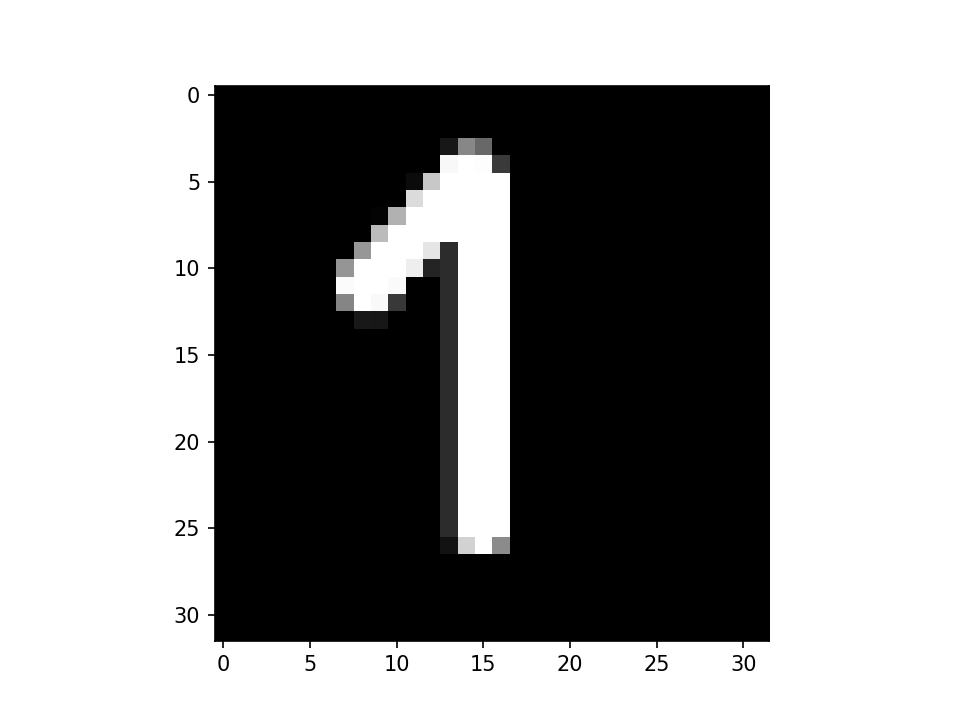

O caractere reconhecido foi 1


In [144]:
x = loadImage("testes/real1.png", True, invert = False)
c = getChar(x)
print("O caractere reconhecido foi %s" % c)